In [1]:
import numpy as np # linear algebra
from matplotlib import pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

In [2]:
df = pd.read_csv('../input/bank-customers/Churn Modeling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
pd.crosstab(df['Geography'],df['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


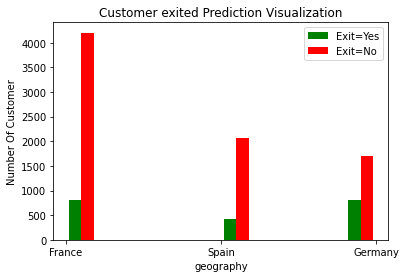

In [10]:
geography_exit_no = df[df['Exited'] == 0].Geography
geography_exit_yes = df[df['Exited'] == 1].Geography

plt.xlabel('geography')
plt.ylabel('Number Of Customer')
plt.title('Customer exited Prediction Visualization')

plt.hist([geography_exit_yes,geography_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

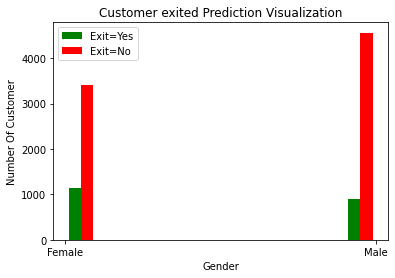

In [12]:
gender_exit_no = df[df['Exited'] == 0].Gender
gender_exit_yes = df[df['Exited'] == 1].Gender

plt.xlabel('Gender')
plt.ylabel('Number Of Customer')
plt.title('Customer exited Prediction Visualization')

plt.hist([gender_exit_yes,gender_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

In [13]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

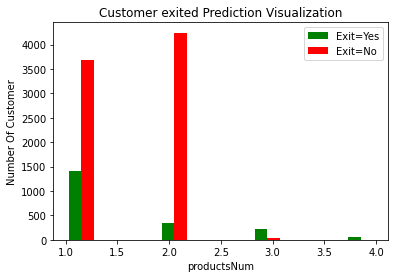

In [14]:
productsNum_exit_no = df[df['Exited'] == 0].NumOfProducts
productsNum_exit_yes = df[df['Exited'] == 1].NumOfProducts

plt.xlabel('productsNum')
plt.ylabel('Number Of Customer')
plt.title('Customer exited Prediction Visualization')

plt.hist([productsNum_exit_yes,productsNum_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
total_exit_sum = df['Exited'].value_counts().values.sum()

In [17]:
no_exit_percentage = round( (df['Exited'].value_counts()[0] / total_exit_sum) * 100 , 2)
no_exit_percentage

79.63

In [18]:
yes_exit_percentage = round( (df['Exited'].value_counts()[1] / total_exit_sum) * 100 , 2)
yes_exit_percentage

20.37

In [19]:
for col in df:
    print(f'{col} : {df[col].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [20]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [21]:
df['Gender'].unique()

array([1, 0])

In [22]:
df1= pd.get_dummies(data=df,columns=['Geography','NumOfProducts'])

In [23]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [24]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


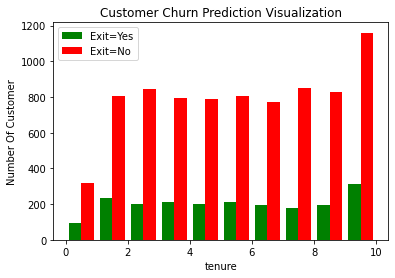

In [25]:
tenure_exit_no = df1[df1['Exited'] == 0].Tenure
tenure_exit_yes = df1[df1['Exited'] == 1].Tenure

plt.xlabel('tenure')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_exit_yes,tenure_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

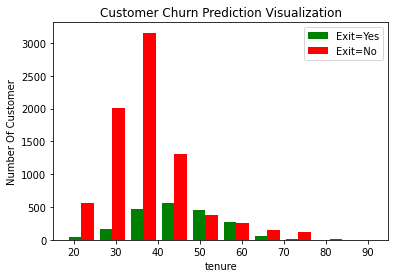

In [26]:
Age_exit_no = df1[df1['Exited'] == 0].Age
Age_exit_yes = df1[df1['Exited'] == 1].Age

plt.xlabel('tenure')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([Age_exit_yes,Age_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

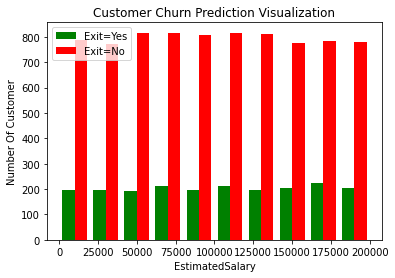

In [27]:
EstimatedSalary_exit_no = df1[df1['Exited'] == 0].EstimatedSalary
EstimatedSalary_exit_yes = df1[df1['Exited'] == 1].EstimatedSalary

plt.xlabel('EstimatedSalary')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([EstimatedSalary_exit_yes,EstimatedSalary_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

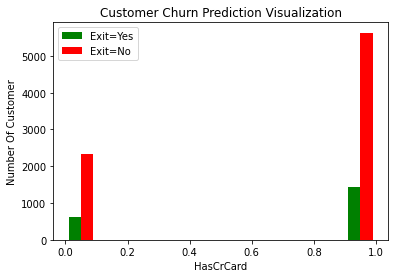

In [28]:
HasCrCard_exit_no = df1[df1['Exited'] == 0].HasCrCard
HasCrCard_exit_yes = df1[df1['Exited'] == 1].HasCrCard

plt.xlabel('HasCrCard')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([HasCrCard_exit_yes,HasCrCard_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

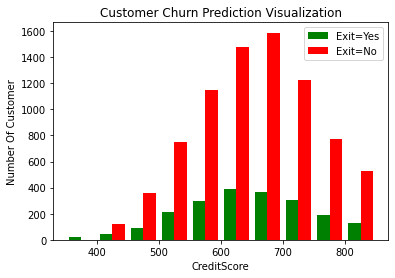

In [29]:
CreditScore_exit_no = df1[df1['Exited'] == 0].CreditScore
CreditScore_exit_yes = df1[df1['Exited'] == 1].CreditScore

plt.xlabel('CreditScore')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([CreditScore_exit_yes,CreditScore_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

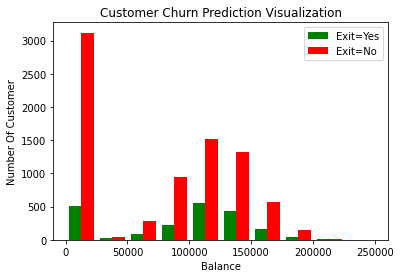

In [30]:
Balance_exit_no = df1[df1['Exited'] == 0].Balance
Balance_exit_yes = df1[df1['Exited'] == 1].Balance

plt.xlabel('Balance')
plt.ylabel('Number Of Customer')
plt.title('Customer Churn Prediction Visualization')

plt.hist([Balance_exit_yes,Balance_exit_no], color=['green','red'],label=['Exit=Yes','Exit=No'])
plt.legend()

In [31]:
df1.isnull().sum().sort_values(ascending = False)

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
NumOfProducts_1      0
NumOfProducts_2      0
NumOfProducts_3      0
NumOfProducts_4      0
dtype: int64

In [32]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,1,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,1,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,1,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,1,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,1,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0


In [33]:
col_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [34]:
df1.loc[:,['CreditScore','Age','Tenure','Balance','EstimatedSalary']]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.562709
2,0.304,0.324324,0.8,0.636357,0.569654
3,0.698,0.283784,0.1,0.000000,0.469120
4,1.000,0.337838,0.2,0.500246,0.395400
...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.481341
9996,0.332,0.229730,1.0,0.228657,0.508490
9997,0.718,0.243243,0.7,0.000000,0.210390
9998,0.844,0.324324,0.3,0.299226,0.464429


In [35]:
for col in df1.columns:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [36]:
X = df1.drop('Exited',axis=1)
y = df1['Exited']

In [37]:
#class imbalance
target_labels = np.array(y)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(target_labels), y= target_labels)
print(class_weights)

[0.62790406 2.45459008]


In [38]:
{v: k for v, k in enumerate(class_weights)}

{0: 0.6279040562602034, 1: 2.454590083456063}

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
X_train.shape

(8000, 15)

In [41]:
X_test.shape

(2000, 15)

In [42]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
7751,0.800,1,0.283784,0.6,0.000000,0,0,0.096273,0,0,1,0,1,0,0
4154,0.752,0,0.216216,0.3,0.000000,1,0,0.981478,1,0,0,0,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,1,1,0.948551,1,0,0,1,0,0,0
9238,0.846,1,0.432432,0.4,0.000000,1,0,0.646869,1,0,0,0,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0,0,0.434670,1,0,0,0,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0,0,0.421898,1,0,0,1,0,0,0
7542,0.314,1,0.216216,0.4,0.000000,1,1,0.303413,0,0,1,0,1,0,0
7524,0.620,1,0.297297,0.8,0.666330,1,1,0.925815,1,0,0,1,0,0,0
9412,0.750,0,0.108108,0.6,0.393324,0,0,0.668609,1,0,0,1,0,0,0
6377,0.684,0,0.202703,0.9,0.000000,1,0,0.567526,1,0,0,1,0,0,0


In [43]:
len(X_train.columns)

15

In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , Input , Activation

encoder_input = keras.Input(shape=(15,))
x = Dense(1024,activation='relu')(encoder_input)
x = Dropout(0.7)(x)
x = Dense(521,activation='relu')(x)
x = Dropout(0.7)(x)
x = Dense(1,activation='sigmoid')(x)
model = keras.Model(encoder_input,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              16384     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 521)               534025    
_________________________________________________________________
dropout_1 (Dropout)          (None, 521)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 522       
Total params: 550,931
Trainable params: 550,931
Non-trainable params: 0
_______________________________________________________

2022-05-24 00:30:41.665903: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,class_weight = {v: k for v, k in enumerate(class_weights)})

2022-05-24 00:30:42.042096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 0.5805 - accuracy: 0.7034
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5313 - accuracy: 0.7362
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5182 - accuracy: 0.7452
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5147 - accuracy: 0.7549
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5125 - accuracy: 0.7617
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5068 - accuracy: 0.7632
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.5018 - accuracy: 0.7617
Epoch 8/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4975 - accuracy: 0.7650
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4941 - accuracy: 0.7713
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4962 - accura

In [46]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8205


[0.44879692792892456, 0.8205000162124634]

In [47]:
yp = model.predict(X_test)
yp[:5]

array([[0.20476973],
       [0.261085  ],
       [0.26303297],
       [0.36661983],
       [0.27891728]], dtype=float32)

In [48]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1595
           1       0.55      0.67      0.60       405

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000



Text(69.0, 0.5, 'Truth')

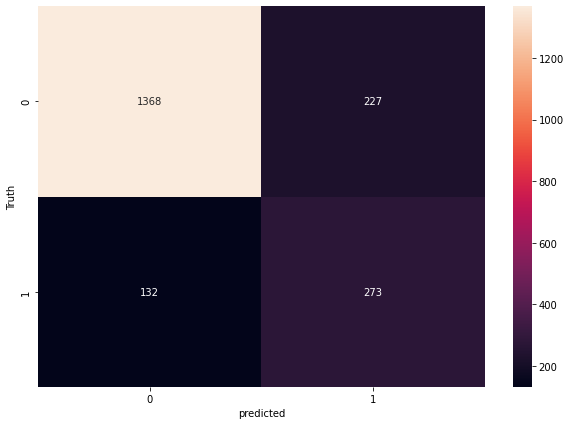

In [50]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [51]:
#accuracy
round((1360+277)/(1360+277+128+235),2)

0.82

In [52]:
#precision for 0 class customers who didnt exit
round(1360 / (1360+128),2)

0.91

In [53]:
#precision for 1 class customers who exit
round(277 / (277+235),2)

0.54

In [54]:
#Recall for 0 class customers who didnt exit
round(1360 / (1360+235),2)

0.85

In [55]:
#Recall for 1 class customers who exit
round(277 / (277+128),2)

0.68